In [1]:
!pip install numpy

In [2]:
!pip install cvxopt

In [3]:
!pip install matplotlib

In [5]:
!pip install pandas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)


In [8]:
## NUMBER OF ASSETS
n_assets = 20

## NUMBER OF OBSERVATIONS
n_obs = 4000

return_vec = np.random.randn(n_assets, n_obs)

In [36]:
print(return_vec)

[[ 0.83301604 -0.04252685  0.54447436 ...  0.35778142 -0.66862132
   0.93639815]
 [-0.21091914 -0.3263479  -0.75566617 ... -0.34697876  1.93122363
   0.38918679]
 [ 0.12904923 -1.21195436 -0.53048929 ...  1.00716293 -0.17801048
  -0.30754119]
 ...
 [-0.57103729  1.99388252  1.75893801 ... -0.75742683 -0.19505016
   0.35433918]
 [-0.818267   -1.13424028  0.48700366 ... -1.58246669 -1.1557431
   2.77436949]
 [ 0.17788898 -1.76138508 -0.97326699 ... -0.4050332   1.29830019
   1.88354122]]


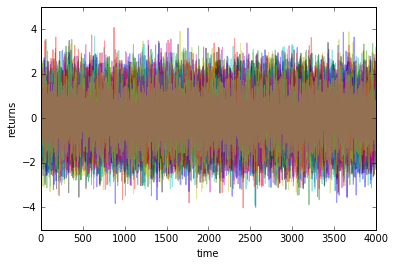

In [9]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [5]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.00321817 0.01581016 0.0176965  0.0162281  0.0092911  0.01006108
 0.01268085 0.01468674 0.01854044 0.00974266 0.01873782 0.00192365
 0.01676938 0.01967141 0.01503649 0.01461972 0.01368459 0.00604057
 0.00884625 0.01645053 0.01576818 0.00415046 0.01712098 0.00837815
 0.00835611 0.00879138 0.01791174 0.00318546 0.01263772 0.00129963
 0.01022722 0.01004745 0.00166471 0.01535392 0.0147256  0.00255911
 0.00530112 0.01434386 0.00925222 0.00434224 0.00032612 0.00054405
 0.00050096 0.01504902 0.0141886  0.00521082 0.01954488 0.002833
 0.00288437 0.01071797 0.00104645 0.00899512 0.00731606 0.01020571
 0.01220464 0.0054934  0.0073651  0.01623527 0.00953803 0.01214026
 0.01853658 0.01120868 0.0169552  0.00535084 0.01377419 0.01240999
 0.01132931 0.01340466 0.00882962 0.01090832 0.0097196  0.01120934
 0.015821   0.01376506 0.00270001 0.01141936 0.01348921 0.0030045
 0.01938011 0.00557694 0.00257861 0.01600261 0.00136984 0.00033749
 0.00900808 0.00382189 0.01276505 0.01856538 0.01768903 0.0023469

In [3]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [12]:
n_portfolios = 5000
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

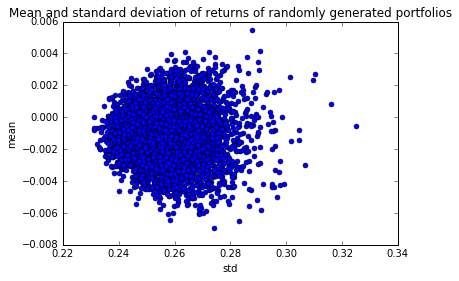

In [13]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

     pcost       dcost       gap    pres   dres
 0:  7.9360e-04 -1.0180e+00  1e+00  1e-16  5e+00
 1:  5.5989e-04 -2.7765e-02  3e-02  2e-16  1e-01
 2: -4.7866e-03 -9.8943e-03  5e-03  2e-16  2e-17
 3: -6.4020e-03 -6.9556e-03  6e-04  4e-17  1e-17
 4: -6.6704e-03 -6.6900e-03  2e-05  7e-17  1e-17
 5: -6.6801e-03 -6.6803e-03  2e-07  2e-16  2e-17
 6: -6.6802e-03 -6.6802e-03  2e-09  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1413e-03 -1.0174e+00  1e+00  4e-16  5e+00
 1:  9.1285e-04 -2.7171e-02  3e-02  1e-16  1e-01
 2: -4.0429e-03 -8.8344e-03  5e-03  3e-16  2e-17
 3: -5.5373e-03 -6.0345e-03  5e-04  4e-16  1e-17
 4: -5.8008e-03 -5.8141e-03  1e-05  2e-16  1e-17
 5: -5.8096e-03 -5.8098e-03  1e-07  6e-17  1e-17
 6: -5.8097e-03 -5.8097e-03  1e-09  3e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5298e-03 -1.0168e+00  1e+00  2e-16  5e+00
 1:  1.3070e-03 -2.6512e-02  3e-02  5e-17  1e-01
 2: -3.2669e-03 -7.7242e

 4:  4.9359e-01  4.9359e-01  1e-08  3e-17  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.5371e-01 -4.5319e-01  1e+00  2e-16  5e+00
 1:  5.5371e-01  5.4226e-01  1e-02  2e-16  5e-02
 2:  5.5371e-01  5.5359e-01  1e-04  3e-16  5e-04
 3:  5.5371e-01  5.5371e-01  1e-06  3e-17  5e-06
 4:  5.5371e-01  5.5371e-01  1e-08  2e-16  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.2116e-01 -3.8577e-01  1e+00  2e-16  5e+00
 1:  6.2116e-01  6.0988e-01  1e-02  4e-17  5e-02
 2:  6.2116e-01  6.2104e-01  1e-04  2e-16  5e-04
 3:  6.2116e-01  6.2116e-01  1e-06  3e-16  5e-06
 4:  6.2116e-01  6.2116e-01  1e-08  2e-16  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.9684e-01 -3.1011e-01  1e+00  2e-16  5e+00
 1:  6.9684e-01  6.8571e-01  1e-02  3e-17  5e-02
 2:  6.9684e-01  6.9673e-01  1e-04  2e-16  5e-04
 3:  6.9684e-01  6.9684e-01  1e-06  3e-16  5e-06
 4:  6.9684e-01  6.9684e-01  1e-08  3e-17  5e-08


     pcost       dcost       gap    pres   dres
 0:  6.2019e+01  6.1012e+01  1e+00  2e-16  5e+00
 1:  6.2019e+01  6.2009e+01  1e-02  2e-17  5e-02
 2:  6.2019e+01  6.2019e+01  1e-04  1e-16  5e-04
 3:  6.2019e+01  6.2019e+01  1e-06  4e-17  5e-06
 4:  6.2019e+01  6.2019e+01  1e-08  2e-16  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.9586e+01  6.8579e+01  1e+00  2e-16  5e+00
 1:  6.9586e+01  6.9576e+01  1e-02  1e-16  5e-02
 2:  6.9586e+01  6.9586e+01  1e-04  2e-16  5e-04
 3:  6.9586e+01  6.9586e+01  1e-06  3e-16  5e-06
 4:  6.9586e+01  6.9586e+01  1e-08  2e-16  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.8077e+01  7.7069e+01  1e+00  3e-16  5e+00
 1:  7.8077e+01  7.8067e+01  1e-02  2e-16  5e-02
 2:  7.8077e+01  7.8076e+01  1e-04  4e-17  5e-04
 3:  7.8077e+01  7.8077e+01  1e-06  2e-16  5e-06
 4:  7.8077e+01  7.8077e+01  1e-08  2e-16  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

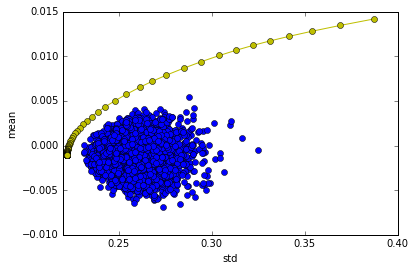

In [14]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [15]:
print(weights)


[[4.54748249e-01]
 [2.78148967e-09]
 [2.44824533e-07]
 [2.44209825e-09]
 [8.34306952e-09]
 [5.21786987e-01]
 [2.13359961e-09]
 [1.37751459e-09]
 [1.13565178e-08]
 [2.32058588e-08]
 [1.58508501e-08]
 [1.05993371e-08]
 [2.17897792e-09]
 [1.48281474e-09]
 [2.34644064e-02]
 [8.51698588e-09]
 [2.32489675e-09]
 [1.03682151e-08]
 [2.65156997e-09]
 [6.96934161e-09]]
